In [ ]:
pip install -U insightface

In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


FACE DETECTION

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 91129.77KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


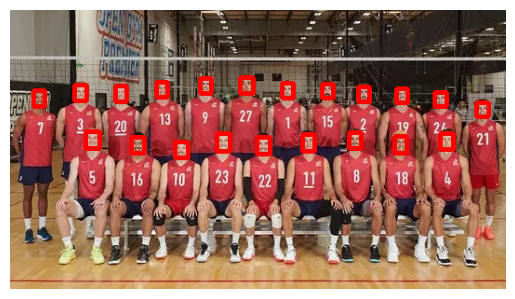

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

# Initialize the FaceAnalysis app
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# Load the image using OpenCV (ensure the file exists)
img_path = '/content/US_volleyball_team3.jpeg'
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image file not found at {img_path}")

# Convert the image to RGB format (required for insightface)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
faces = app.get(img)

# Manually draw rectangles around faces with a custom color
for face in faces:
    # Get the bounding box coordinates (x1, y1, x2, y2)
    bbox = face['bbox']
    x1, y1, x2, y2 = map(int, bbox)

    # Set the color for the rectangle (RGB format)
    rectangle_color = (255, 0, 0)  # Red color (change as needed)
    thickness = 3  # Thickness of the rectangle

    # Draw the rectangle
    img = cv2.rectangle(img, (x1, y1), (x2, y2), rectangle_color, thickness)

# Save the output image
output_path = '/content/volleyball team.jpg'
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving

# Display the output image
plt.imshow(img)
plt.axis('off')
plt.show()


FACE RECOGNITION

In [ ]:
from insightface.app import FaceAnalysis

# Initialize the FaceAnalysis app
app = FaceAnalysis(name='buffalo_l')  # Recognition model is part of 'buffalo_l'
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
def normalize(embedding):
    norm = np.linalg.norm(embedding)
    if norm == 0:
        return embedding  # Handle zero vectors gracefully
    return embedding / norm

In [ ]:
# Process the known face image (pf1_img)
pf1_img = cv2.imread('/content/Kyle-Russell.jpg')
pf1_img_rgb = cv2.cvtColor(pf1_img, cv2.COLOR_BGR2RGB)

# Detect faces and extract embeddings
faces_in_pf1 = app.get(pf1_img_rgb)  # Detect faces in pf1 image

# Ensure at least one face is detected
if faces_in_pf1:
    pf1_embedding = faces_in_pf1[0].embedding  # Use the first face's embedding
else:
    print("No faces detected in pf1 image")

In [ ]:
# Process the target image (volleyball_img)
volleyball_img = cv2.imread('/content/US_volleyball_team3.jpeg')
volleyball_img_rgb = cv2.cvtColor(volleyball_img, cv2.COLOR_BGR2RGB)

# Detect faces in the target image
faces_in_volleyball = app.get(volleyball_img_rgb)

# Compare embeddings for recognition
for face in faces_in_volleyball:
    # Calculate similarity (Euclidean distance)
    pf1_embedding_normalized = normalize(pf1_embedding)
    face_embedding_normalized = normalize(face.embedding)

    #cosine_similarity = np.dot(face_embedding_normalized, pf1_embedding_normalized )
    #print("Cosine Similarity:", cosine_similarity)
    distance = np.linalg.norm(face_embedding_normalized - pf1_embedding_normalized)
    print("Normalized Distance:", distance)

    # Threshold for recognition (adjust as needed)
    #if  cosine_similarity > 0.363:  # Lower threshold means stricter matching
        #print("Match found!")
    if  distance < 1.22:  # Lower threshold means stricter matching
        print("Match found!")

        # Draw a rectangle around the matched face
        bbox = face.bbox
        x1, y1, x2, y2 = map(int, bbox[:4])
        cv2.rectangle(volleyball_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

Normalized Distance: 1.3786345
Normalized Distance: 1.4573783
Normalized Distance: 1.3906559
Normalized Distance: 1.4521772
Normalized Distance: 1.4712034
Normalized Distance: 1.40196
Normalized Distance: 1.4236428
Normalized Distance: 1.3792125
Normalized Distance: 1.3887408
Normalized Distance: 1.3761538
Normalized Distance: 1.3755443
Normalized Distance: 1.3884144
Normalized Distance: 1.3993526
Normalized Distance: 1.2125131
Match found!
Normalized Distance: 1.4334893
Normalized Distance: 1.2661004
Normalized Distance: 1.4522305
Normalized Distance: 1.3860132
Normalized Distance: 1.4390209
Normalized Distance: 1.3933698
Normalized Distance: 1.3743132


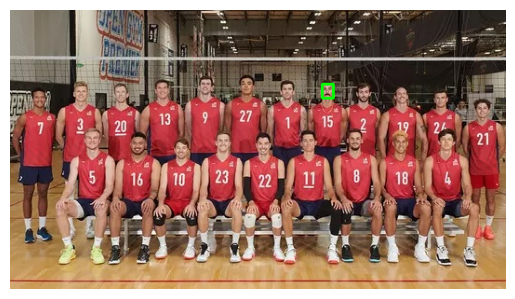

In [ ]:
# Save the result image
output_path = '/content/recognized_faces.jpeg'
cv2.imwrite(output_path, volleyball_img)

# Display the result image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(volleyball_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
print(type(face))

<class 'insightface.app.common.Face'>


In [ ]:

print(type(faces_in_pf1))

<class 'list'>


In [ ]:
norm1 = np.linalg.norm(face_embedding_normalized)
norm2 = np.linalg.norm(pf1_embedding_normalized)
print("Norm of embedding 1:", norm1)
print("Norm of embedding 2:", norm2)



Norm of embedding 1: 1.0
Norm of embedding 2: 1.0


In [ ]:
from insightface.app import FaceAnalysis
import cv2
import numpy as np

# Initialize the FaceAnalysis app
app = FaceAnalysis(name='buffalo_l')  # Recognition model is part of 'buffalo_l'
app.prepare(ctx_id=0, det_size=(640, 640))

def normalize(embedding):
    norm = np.linalg.norm(embedding)
    if norm == 0:
        return embedding  # Handle zero vectors gracefully
    return embedding / norm

# Process the known face image (pf1_img)
pf1_img = cv2.imread('/content/Kyle-Russell.jpg')
pf1_img_rgb = cv2.cvtColor(pf1_img, cv2.COLOR_BGR2RGB)

# Detect faces and extract embeddings
faces_in_pf1 = app.get(pf1_img_rgb)  # Detect faces in pf1 image

# Ensure at least one face is detected
if faces_in_pf1:
    pf1_embedding = faces_in_pf1[0].embedding  # Use the first face's embedding
else:
    print("No faces detected in pf1 image")
    pf1_embedding = None  # Handle the case where no faces are found

# Process the target image (volleyball_img)
volleyball_img = cv2.imread('/content/US_volleyball_team3.jpeg')
volleyball_img_rgb = cv2.cvtColor(volleyball_img, cv2.COLOR_BGR2RGB)

# Detect faces in the target image
faces_in_volleyball = app.get(volleyball_img_rgb)

# Compare embeddings for recognition
if pf1_embedding is not None:
    for face in faces_in_volleyball:
        # Calculate similarity (Euclidean distance)
        pf1_embedding_normalized = normalize(pf1_embedding)
        face_embedding_normalized = normalize(face.embedding)

        distance = np.linalg.norm(face_embedding_normalized - pf1_embedding_normalized)
        print("Normalized Distance:", distance)

        # Define thresholds
        match_threshold = 1.22  # Adjust as needed

        # Draw rectangles based on the threshold
        bbox = face.bbox
        x1, y1, x2, y2 = map(int, bbox[:4])

        if distance < match_threshold:
            print("Match found!")
            # Draw a green rectangle for matched faces
            cv2.rectangle(volleyball_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        else:
            # Draw a red rectangle for unmatched faces
            cv2.rectangle(volleyball_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Save or display the result
output_path = '/content/volleyball_with_rectangles.jpg'
cv2.imwrite(output_path, volleyball_img)
print(f"Result saved to {output_path}")

# If running locally, uncomment the lines below to display the image
# cv2.imshow('Result', volleyball_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Normalized D

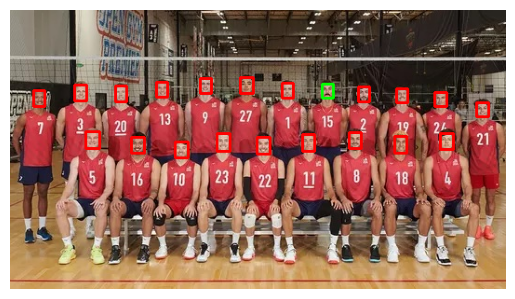

In [ ]:
cv2.imwrite(output_path, volleyball_img)

# Display the result image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(volleyball_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Finding Naeimeh Nezamdoost face from others in Joker.

In [ ]:
from insightface.app import FaceAnalysis
import cv2
import numpy as np

# Initialize the FaceAnalysis app
app = FaceAnalysis(name='buffalo_l')  # Recognition model is part of 'buffalo_l'
app.prepare(ctx_id=0, det_size=(640, 640))

def normalize(embedding):
    norm = np.linalg.norm(embedding)
    if norm == 0:
        return embedding  # Handle zero vectors gracefully
    return embedding / norm

# Process the known face image (pf1_img)
pf1_img = cv2.imread('/content/naeimeh2.jpeg')  # Update with the correct path
pf1_img_rgb = cv2.cvtColor(pf1_img, cv2.COLOR_BGR2RGB)

# Detect faces and extract embeddings
faces_in_pf1 = app.get(pf1_img_rgb)  # Detect faces in pf1 image

# Ensure at least one face is detected
if faces_in_pf1:
    pf1_embedding = normalize(faces_in_pf1[0].embedding)  # Use the first face's normalized embedding
else:
    print("No faces detected in pf1 image")
    pf1_embedding = None  # Handle the case where no faces are found

# Process the video
cap = cv2.VideoCapture("/content/jok.mp4")  # Update with the correct video path
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
output_path = "/path/to/output_video.mp4"  # Update with the desired output path

# Define the codec and create VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

from google.colab.patches import cv2_imshow

while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    # Detect faces in the current frame
    faces_in_frame = app.get(frame)

    for face in faces_in_frame:
        # Normalize current face embedding
        face_embedding_normalized = normalize(face.embedding)

        # Calculate the distance
        distance = np.linalg.norm(face_embedding_normalized - pf1_embedding)
        print("Normalized Distance:", distance)

        # Define thresholds
        match_threshold = 1.22  # Adjust this as needed

        # Get the bounding box
        bbox = face.bbox
        x1, y1, x2, y2 = map(int, bbox[:4])

        if distance < match_threshold:
            # Draw a green rectangle for matched faces
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, "Matched", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        else:
            # Draw a red rectangle for unmatched faces
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(frame, "Unmatched", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Write the frame with rectangles to the output video
    out.write(frame)

    # Show the frame in Colab
    cv2_imshow(frame)
    if cv2.waitKey(10) == ord("q"):
        break


Output hidden; open in https://colab.research.google.com to view.